# Práctica 5. Clustering

### a) Importar librerías necesarias

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
import ipympl
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
%matplotlib ipympl

In [4]:
path=('./data/1_data_limpia/Environment_LandUse_clean.csv')
data = pd.read_csv(path, encoding='latin-1')

# Clustering

## 2. K-means

In [5]:
# Selección de variables
X = np.array(data[['Agricultural land', 'Naturally regenerating forest','Forest land']])
Y = np.array(data['area_code'])

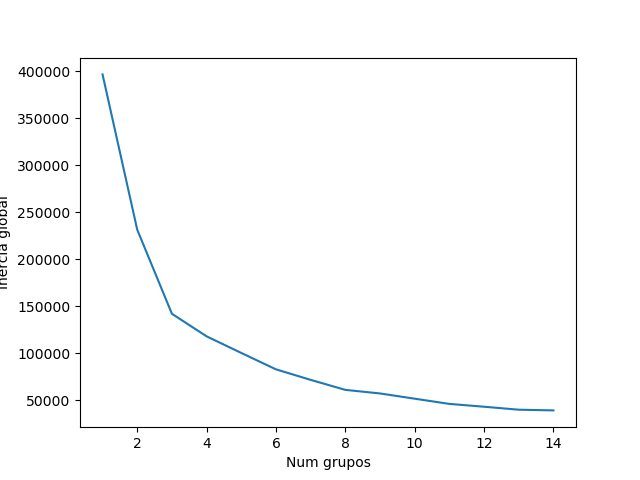

In [6]:
# Obtener el número ideal de clústers

# Método de codo
# Existen otros como:Criterio de Calinski, Affinity propagation (AP)
# Gap, dendogramas

inercias = np.zeros(15)
for k in np.arange(1,15):
    model = KMeans(n_clusters=k,init='random')
    model = model.fit(X)
    inercias[k] = model.inertia_
plt.plot(np.arange(1,15),inercias[1:])
plt.xlabel('Num grupos')
plt.ylabel('Inercia global')
plt.show()

In [6]:
# Algoritmo de cluster
kmeans = KMeans(n_clusters=3,init='k-means++').fit(X)
#init='random'
#init='ndarray'

[[21.98307692 93.33553846 58.20076923]
 [49.73367347 87.88489796 19.0122449 ]
 [25.99482759 11.24       18.25931034]]


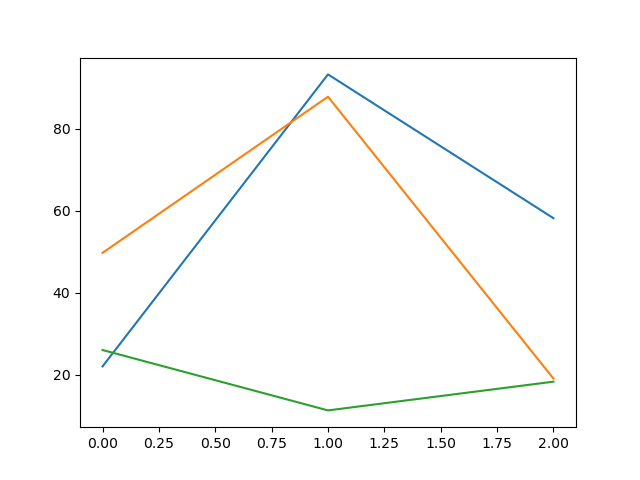

In [7]:
C = kmeans.cluster_centers_
print(C)
plt.plot(C.T)

In [8]:
# Gráfica con los 3 clústers
# Predecir los clústers
grupos = kmeans.predict(X)#Nos dice que observación pertenece a cada grupo

Text(0.5, 0, 'Forest land')

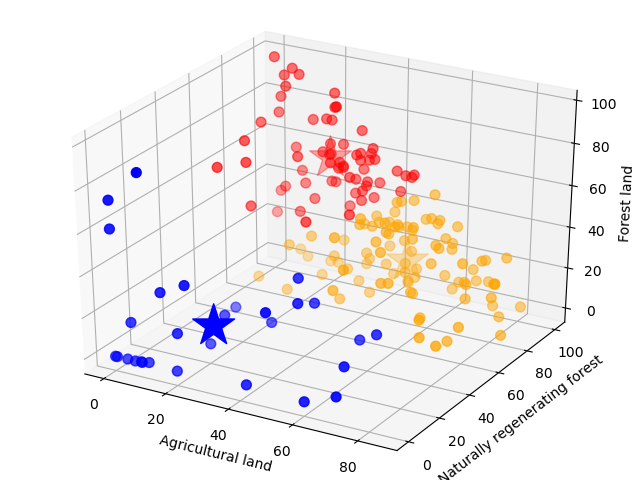

In [9]:
colores=['red','orange','blue']
asignar=[]
for row in grupos:
    asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],c=asignar, s=50)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
ax.set_xlabel('Agricultural land')
ax.set_ylabel('Naturally regenerating forest')
ax.set_zlabel('Forest land')

In [10]:
data['cluster'] = grupos
data[['area', 'cluster']].head(10)

,area,cluster
0,Armenia,1
1,Afghanistan,1
2,Albania,1
3,Algeria,1
4,American Samoa,0
5,Andorra,1
6,Angola,0
7,Antigua and Barbuda,2
8,Argentina,1
9,Australia,1


In [11]:
data[['area', 'cluster']].query('area == "Mexico"')

,area,cluster
103,Mexico,1


In [12]:
# Extraer los elementos de cada clúster
#Cluster 1
idx_0 = grupos==0
subdata_0 = X[idx_0]
pd.value_counts(data['area'][idx_0])

American Samoa    1
Latvia            1
Liechtenstein     1
Malaysia          1
Martinique        1
                 ..
Honduras          1
Croatia           1
Indonesia         1
Jamaica           1
Montenegro        1
Name: area, Length: 65, dtype: int64

In [13]:
#Cluster 2
idx_1 = grupos==1
subdata_1 = X[idx_1]
pd.value_counts(data['area'][idx_1])

Armenia         1
South Africa    1
Slovakia        1
Sierra Leone    1
Senegal         1
               ..
Haiti           1
Guinea          1
Guatemala       1
Greece          1
China           1
Name: area, Length: 98, dtype: int64

In [14]:
#Cluster 3
idx_2 = grupos==2
subdata_2 = X[idx_2]
pd.value_counts(data['area'][idx_2])

Antigua and Barbuda      1
Nauru                    1
Anguilla                 1
Belgium                  1
Uzbekistan               1
Tokelau                  1
Saint Kitts and Nevis    1
Palau                    1
Qatar                    1
Portugal                 1
Poland                   1
Pitcairn                 1
Czechia                  1
Vanuatu                  1
Libya                    1
Bahrain                  1
Kuwait                   1
Jordan                   1
Israel                   1
Ireland                  1
Iceland                  1
Greenland                1
Kiribati                 1
Gibraltar                1
Egypt                    1
Denmark                  1
Cabo Verde               1
Bermuda                  1
Isle of Man              1
Name: area, dtype: int64

In [15]:
#Observaciones que están más cerca del centroide.
#Rasgos de personalidad característicos que representan al cluster
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest  #Posición en el array de naciones

array([ 45, 167,   7], dtype=int64)

In [16]:
#Nombres de las naciones más cercanas al centroide.
area = data['area'].values 
for row in closest:
    print(area[row])

Estonia
Tonga
Antigua and Barbuda


In [47]:
data[['area', 'Agricultural land', 'Naturally regenerating forest','Forest land']].query('area == "Mexico"')

,area,Agricultural land,Naturally regenerating forest,Forest land
103,Mexico,49.97,99.85,33.79


In [18]:
#Clasificar nuevas muestras 
X_new = np.array([[49.97, 99.85, 33.79]]) #valores de México
new_labels = kmeans.predict(X_new)
print(new_labels)

[1]


## Comparación en la asignación de clústers entre m.jerárquico y m.no jerárquico

In [29]:
output = data[['area', 'cluster']]

In [30]:
path_1=('./data/2_data_procesada/clustering_jerarquico.csv')
data_1 = pd.read_csv(path_1, encoding='latin-1')

In [31]:
merge = data_1.merge(output, how='inner', on='area')

In [33]:
merge.cluster_x.replace({0:1,1:2,2:3}, inplace=True)
merge.cluster_y.replace({0:3,1:2,2:1}, inplace=True)

,area,cluster_x,cluster_y
0,Armenia,2,2
1,Afghanistan,2,2
2,Albania,2,2
3,Algeria,2,2
4,American Samoa,3,3
...,...,...,...
185,Mayotte,2,2
186,Serbia,2,2
187,Montenegro,3,3
188,South Sudan,2,2


In [42]:
#Identificar los casos en los que no hay igualdad entre clusters
merge['cluster_x'].compare(merge['cluster_y'], keep_equal=False)

,self,other
6,2.0,3.0
32,2.0,3.0
38,2.0,1.0
69,2.0,3.0
79,2.0,3.0
81,2.0,1.0
134,2.0,3.0
143,2.0,3.0
149,3.0,2.0
150,2.0,3.0


In [43]:
#Lista de naciones en donde se asignó diferente clúster de acuerdo con el método jerárquico y no jerárquico
items = [6,32,38,69,79,81,134,143,149,150,174,176]
merge.filter(items=items, axis=0)

,area,cluster_x,cluster_y
6,Angola,2,3
32,Colombia,2,3
38,Denmark,2,1
69,Croatia,2,3
79,Jamaica,2,3
81,Jordan,2,1
134,Zimbabwe,2,3
143,Sao Tome and Principe,2,3
149,Slovakia,3,2
150,Singapore,2,3
